### SKTime

In [25]:
import sktime
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster

### Timeseries Forecasting

In [26]:
y = load_airline()

In [27]:
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [28]:
# step 1: specify the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12) #mean, drift

# step 2: specify forecasting horizon
fh = np.arange(1, 37)  # we want to predict the next 36 months

# step 3: fit the forecaster
forecaster.fit(y, fh=fh)

# step 4: make the forecast
y_pred = forecaster.predict()

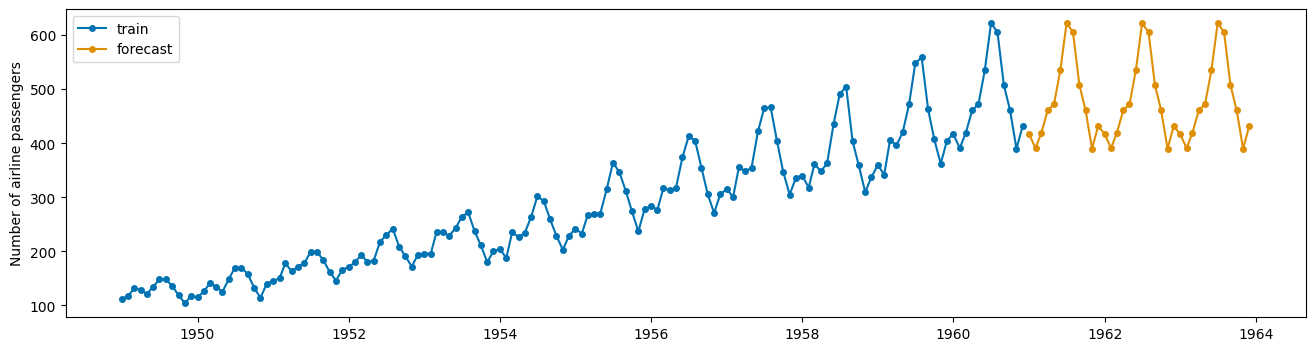

In [29]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(y, y_pred, labels=["train", "forecast"])

### Timeseries Classification

In [30]:
# get the data
from sktime.datasets import load_osuleaf #http://www.timeseriesclassification.com/description.php?Dataset=OSULeaf
from sklearn.metrics import classification_report, accuracy_score

# for training
X_train, y_train = load_osuleaf(split="train", return_type="numpy3D")
#cat /proc/sys/fs/inotify/max_user_watches

# for prediction
X_new, y_test = load_osuleaf(split="test", return_type="numpy3D")
X_new = X_new[:100]
y_test = y_test[:100]

In [32]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels import ScipyDist
from sktime.dists_kernels.compose_tab_to_panel import AggrDist

# step 1 - specify the classifier
mean_eucl_dist = AggrDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=mean_eucl_dist)

# step 2 - fit the classifier
clf.fit(X_train, y_train)

# step 3 - predict labels on new data
y_pred = clf.predict(X_new)

In [33]:
X_train[:2]

array([[[ 5.5067091e-01,  4.6471588e-01,  3.7526084e-01,  2.9305977e-01,
          2.0642720e-01,  1.2730744e-01,  1.3329609e-01,  4.8569914e-02,
         -1.0611307e-02, -9.2537187e-02, -1.3344732e-01, -1.9703972e-01,
         -2.1514807e-01, -3.0597432e-01, -3.8932154e-01, -4.6005551e-01,
         -5.4681588e-01, -5.6313145e-01, -6.4556041e-01, -7.3268024e-01,
         -8.1264798e-01, -9.0074933e-01, -9.8982207e-01, -1.0802103e+00,
         -1.1699535e+00, -1.2587605e+00, -1.3235518e+00, -1.4242430e+00,
         -1.4891121e+00, -1.5872739e+00, -1.6873132e+00, -1.8101804e+00,
         -1.9148920e+00, -1.9912036e+00, -2.0657639e+00, -2.1244627e+00,
         -2.1937424e+00, -2.2602403e+00, -2.3478834e+00, -2.4079070e+00,
         -2.4480263e+00, -2.4428834e+00, -2.3994769e+00, -2.3242773e+00,
         -2.2695305e+00, -2.1909616e+00, -2.1228822e+00, -2.0583905e+00,
         -1.9770250e+00, -1.9391638e+00, -1.8449628e+00, -1.7667921e+00,
         -1.7161038e+00, -1.6428757e+00, -1.5600839

In [34]:
X_train.shape, y_train.shape, X_new.shape, y_pred.shape

((200, 1, 427), (200,), (100, 1, 427), (100,))

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.18      1.00      0.30        15
           2       0.12      0.04      0.06        28
           3       0.25      0.12      0.17        16
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        11

    accuracy                           0.18       100
   macro avg       0.09      0.19      0.09       100
weighted avg       0.10      0.18      0.09       100



/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [36]:
accuracy_score(y_test, y_pred)

0.18

### Multivariate Forecaster

In [37]:
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = VAR() #vector autoregression
forecaster.fit(y, fh=[1, 2, 3])

y_pred = forecaster.predict()

In [38]:
y

,GNPDEFL,GNP
Period,,
1947,83.0,234289.0
1948,88.5,259426.0
1949,88.2,258054.0
1950,89.5,284599.0
1951,96.2,328975.0
1952,98.1,346999.0
1953,99.0,365385.0
1954,100.0,363112.0
1955,101.2,397469.0


In [39]:
y_pred

,GNPDEFL,GNP
Period,,
1963,121.688295,578514.398653
1964,124.353664,601873.015890
1965,126.847886,625411.588754


In [40]:
from sktime.registry import all_estimators

for forecaster in all_estimators(filter_tags={"scitype:y": ["multivariate", "both"]}):
    print(forecaster[0])

AutoTS
BaggingForecaster
ColumnEnsembleForecaster
DynamicFactor
ESRNNForecaster
EnsembleForecaster
FallbackForecaster
FhPlexForecaster
ForecastByLevel
ForecastKnownValues
ForecastX
ForecastingGridSearchCV
ForecastingOptunaSearchCV
ForecastingPipeline
ForecastingRandomizedSearchCV
ForecastingSkoptSearchCV
GroupbyCategoryForecaster
HierarchyEnsembleForecaster
IxToX
LTSFDLinearForecaster
LTSFLinearForecaster
LTSFNLinearForecaster
LTSFTransformerForecaster
MomentFMForecaster
MultiplexForecaster
Permute
PluginParamsForecaster
SCINetForecaster
TinyTimeMixerForecaster
TransformSelectForecaster
TransformedTargetForecaster
VAR
VARMAX
VARReduce
VECM
YtoX


### Univariate Forecaster

In [41]:
from sktime.datasets import load_longley
from sktime.forecasting.arima import ARIMA

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = ARIMA()
forecaster.fit(y, fh=[1, 2, 3])

/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA()

In [42]:
forecaster.forecasters_

,GNPDEFL,GNP
forecasters,ARIMA(),ARIMA()


In [43]:
forecaster.predict()

/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mayur/Documents/git-repo-with-ads/Explore-Libraries/timeseries-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,GNPDEFL,GNP
Period,,
1963,116.618752,548785.487694
1964,116.342230,542932.337375
1965,116.070353,537323.873818
